# Tensorboard 활용

## `Embedding`

- IPython.display.display(), IPython.display.Image() 를 이용해서, 훈련된 weight 값의 이미지 표시
- 동일한 weight 값을 텐서보드 embedding 으로 확인
    - embedding 을 위한 레이블 데이터 처리
- MNIST 훈련 데이터 일부에 대해서, 입력값과 linear mnist 출력단 값을 매핑하는 embedding 생성 후 시각화
    - embedding 을 위한 매핑 생성
    - embedding 을 위한 스프라이트 이미지 처리
    - embedding 으로 보여줄 2차원 텐서 처리

## 수요일 실습의 변수 시각화 (심화주제) 참고 

<img src="Selection_20170906_14_15_42_d973.png" style="width:45.0em;border:5px solid red;border-radius:5px"/>

<img src="d5222c6e3d15770a.png" style="width:55.0rem">
<center>
Image from: https://codelabs.developers.google.com/codelabs/cloud-tensorflow-mnist/#3
</center>

### 수요일 실습의 mnist_linear.py 에서 발췌

In [1]:
%matplotlib inline
from __future__ import print_function, division

import os

import numpy as np
import tensorflow as tf
from mnist_data import load_mnist, load_mnist_t10k
from tqdm import tqdm
from scipy.misc import imsave

## 데이터는 이전의 Tensorboard 활용 실습에서 사용한 것을 다시 사용

In [2]:
data_dir = './mnist'

### MNIST 데이터 특성 및, batch size, learning rate 설정

In [3]:
batch_size       = 128
learning_rate    = 0.5

input_size       = 28 * 28
output_size      = 10

## MNIST 훈련용 그래프 구축

In [4]:
input_          = tf.placeholder(shape=[None, input_size],
                                 dtype=tf.float32, name="input")
label_          = tf.placeholder(shape=[None],
                                 dtype=tf.int64, name="label")

weights         = tf.Variable(tf.zeros([input_size, output_size]))
biases          = tf.Variable(tf.zeros([output_size]))
output          = tf.matmul(input_, weights) + biases

pred            = tf.nn.softmax(output)

label_onehot    = tf.one_hot(label_, output_size, axis=1)
loss            = tf.reduce_mean(
                    tf.nn.softmax_cross_entropy_with_logits(
                        logits=output, 
                        labels=label_onehot))
trainer         = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
optimize        = trainer.minimize(loss)

correct         = tf.equal(tf.argmax(pred, axis=1), label_)
accuracy        = tf.reduce_mean(tf.cast(correct, tf.float32))

## 그래프는 준비되었고, 이제 훈련/테스트를 위한 루프를 작성

### 데이터 로딩


In [5]:
images, labels        = load_mnist(data_dir)
t_images, t_labels    = load_mnist_t10k(data_dir)
images                = images / 127.0 - 1.0
t_images              = t_images / 127.0 - 1.0

### 세션 설정, 세션 생성, 초기화

In [6]:
session = tf.InteractiveSession(config=tf.ConfigProto(gpu_options={'allow_growth':True}))
init    = tf.global_variables_initializer()
session.run(init)

### 훈련용 배치 갯수, 테스트용 배치 갯수 계산


In [7]:
batch_count    = 60000 // batch_size
test_count     = 10000 // batch_size

In [8]:
max_epochs     = 100

In [9]:
for ep in tqdm(range(max_epochs)):
    total_loss = 0
    total_acc_v = 0
    for i in range(batch_count):
        img = np.reshape(
                images[i*batch_size:(i+1)*batch_size],
                [batch_size, 28 * 28])
        lbl = (labels[i*batch_size:(i+1)*batch_size])
        _, loss_v, acc_v = session.run(
            [optimize, loss, accuracy], 
            feed_dict= {input_: img, label_: lbl})
        total_loss += loss_v
        total_acc_v += acc_v

    total_acc = 0
    for a in range(test_count):
        index = a * batch_size
        img = np.reshape(
                t_images[index:index+batch_size],
                [batch_size, 28 * 28])
        lbl = t_labels[index:index+batch_size]
        acc = session.run(accuracy, feed_dict={input_:img, label_:lbl})
        total_acc += acc
    total_acc = total_acc / test_count

100%|██████████| 100/100 [00:38<00:00,  2.61it/s]


In [10]:
print('epoch %d: loss: %.5f acc: %.5f test_acc: %.2f%%' % (
    ep+1, 
    total_loss / batch_count, 
    total_acc_v / batch_count, 
    total_acc * 100))

epoch 100: loss: 0.87104 acc: 0.89553 test_acc: 90.95%


### IPython.display.display(), IPython.display.Image() 를 이용해서 이미지 표시

- 학습된 weight 시각화 이미지를 주피터 노트북으로 보기 위해서 IPython.display 모듈 사용
- IPython.display는 주피터 노트북 안에서만 사용할 수 있는 모듈
- Image() - 로컬 파일, url 주소, 또는 버퍼에서 이미지를 가져오기 위한 클래스
- display() - Image() 객체를 jupyter 노트북에 표시하는 메소드
- display() 메소드가 지원하는 객체 유형에는:
  - Image() - 이미지
  - Audio() - 오디오
  - HTML() - HTML 텍스트 객체
  - Javascript()
  - ...

In [11]:
import IPython.display
dir(IPython.display)

['Audio',
 'DisplayHandle',
 'DisplayObject',
 'FileLink',
 'FileLinks',
 'HTML',
 'IFrame',
 'Image',
 'JSON',
 'Javascript',
 'Latex',
 'Markdown',
 'Math',
 'Pretty',
 'SVG',
 'ScribdDocument',
 'TextDisplayObject',
 'VimeoVideo',
 'YouTubeVideo',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 'clear_output',
 'display',
 'display_html',
 'display_javascript',
 'display_jpeg',
 'display_json',
 'display_latex',
 'display_markdown',
 'display_pdf',
 'display_png',
 'display_pretty',
 'display_svg',
 'publish_display_data',
 'set_matplotlib_close',
 'set_matplotlib_formats',
 'update_display']

In [12]:
from IPython.display import display,Image

In [13]:
# image dump for trained variables
w_t = session.run(weights).transpose()
for n in range(10):
    w = w_t[n]
    w = np.reshape(w, [28, 28])
    w_min = w.min()
    w_max = w.max()
    w_1 = (w - w_min) / (w_max - w_min)
    w_255 = w_1 * 255
    imsave('filter{}.png'.format(n), w_255)

In [14]:
for n in range(10):
    display(Image(filename='filter{}.png'.format(n),width=140,height=140))

### 임베딩 데이터를 저장할 processed 디렉토리 생성

In [15]:
%%bash
rm -fr processed
rm -fr save

### 임베딩 데이터를 표시할 때 레이블 데이터를 보여주기 위한 메타 데이터 파일

In [16]:
metadata_label_tsv = './label.tsv'

### label.tsv 에는 뭐가 들어 있나

In [17]:
!cat ./label.tsv

[0=영]
[1=일]
[2=이]
[3=삼]
[4=사]
[5=오]
[6=육]
[7=칠]
[8=팔]
[9=구]

### 메타데이터용 파일은 processed 디렉토리에 있어야 함

In [18]:
!mkdir -p processed
!cp label.tsv processed/

### 임베딩에 사용할 변수 생성

- 간단하게 체크하기 위해서, 위의 이미지를 그릴 때 사용한 것 처럼 `weights` 변수의 역행렬을 이용

- tf.global_initializer() 이미 실행한 상태에서 텐서플로우 변수를 새로 만든 것이므로 initializer 를 실행해 주어야 함



In [19]:
embedding_var = tf.Variable(w_t, name='embedding')
session.run(embedding_var.initializer)

### project 플러그인에 포함된 ProjectorConfig() 클래스 생성

In [20]:
from tensorflow.contrib.tensorboard.plugins import projector
config = projector.ProjectorConfig()

### config 에 embeddings 항목 하나를 새로 만들어 추가하고, 설정

In [21]:
embedding = config.embeddings.add()
embedding.tensor_name = embedding_var.name
embedding.metadata_path = './label.tsv' # summary directory 부터의 상대경로

### embedding 을 `processed` 디렉토리에 기록해 줄 FileWriter 생성

- `FileWriter` 는 필요에 따라 여러개 생성해서 사용해도 됨

- 하지만 서로 다른 `FileWriter` 가 같은 디렉토리에 쓰고 있으면 `tensorboard` 가 오동작해서 그래프가 업데이트 되지 않는 현상 등이 발생할 수 있음



In [22]:
summary_writer = tf.summary.FileWriter('processed')

### projector 플러그인의 visualize_embeddings() 메소드 호출

In [23]:
projector.visualize_embeddings(summary_writer, config)

In [24]:
!ls -l processed

total 16
-rw-r--r--  1 rhee  staff  79 Sep  7 09:08 label.tsv
-rw-r--r--  1 rhee  staff  75 Sep  7 09:08 projector_config.pbtxt


### `embedding_var` 를 저장하기 위한 `saver` 를 만들고, 이를 이용해서 저장

In [25]:
saver = tf.train.Saver([embedding_var])
saver.save(session, 'processed/save-1.ckpt', 1)

'processed/save-1.ckpt-1'

### 텐서보드 실행

- 텐서보드 감상 후 정지 버튼을 누르거나 `Kernel` `->` `Interrupt` 메뉴를 선택


In [26]:
!tensorboard --logdir processed

Starting TensorBoard 54 at http://rhee-mbp.local:6006
(Press CTRL+C to quit)
^C


# 입력값과 linear mnist 출력단 값을 매핑하는 embedding

### 텐서보드 임베딩 탭에서 보여줄 데이터 포인트의 이미지 생성

- `t_images` 의 10,000 개 이미지 사용

- 10x10 으로 묶어서 2800x2800 png 생성 - **sprite**


In [27]:
t_images.shape, t_images.dtype

((10000, 28, 28), dtype('float64'))

In [28]:
# 숫자마다 다른 색으로 나오면 보기 좋겠지요. 컬러 팔레트 설정
import matplotlib
import matplotlib.pyplot as plt
colors = np.array(matplotlib.colors.hsv_to_rgb([(n * 0.1,0.5,0.5)
                  for n in range(10)]) * 255,dtype=np.uint8)

In [29]:
# 최종 28 x 100 by 28 x 100, 총 10,000 개 이미지의 썸네일 시트 (**sprite**)
sprite_img = np.zeros([2800,2800,3],dtype=np.float32)

# 세로축으로 100개 나열
for y in xrange(100):
    # 가로축으로 100개 나열
    for x in xrange(100):
        index = x+y*100
        colr       = colors[int(t_labels[index])]    # shape (3,)
        t_img_bw   = t_images[index]                 # shape: (28,28), 범위 0~1.0
        # index 번째 이미지를 복사할 버퍼 28x28
        t_img_c    = np.zeros([28,28,3], dtype=np.float32)
        # t_img_bw 어레이에서 해당 픽셀의 값이 0 인 경우만 (배경부분)
        # colr 값으로 채움
        t_img_c[t_img_bw <= 0,:] = colr
        # 2800 x 2800 스프라이트 가운데 자기 자리에 복사
        sprite_img[x*28:x*28+28,y*28:y*28+28,:] = t_img_c

In [30]:
plt.imsave('sprite.png',sprite_img)

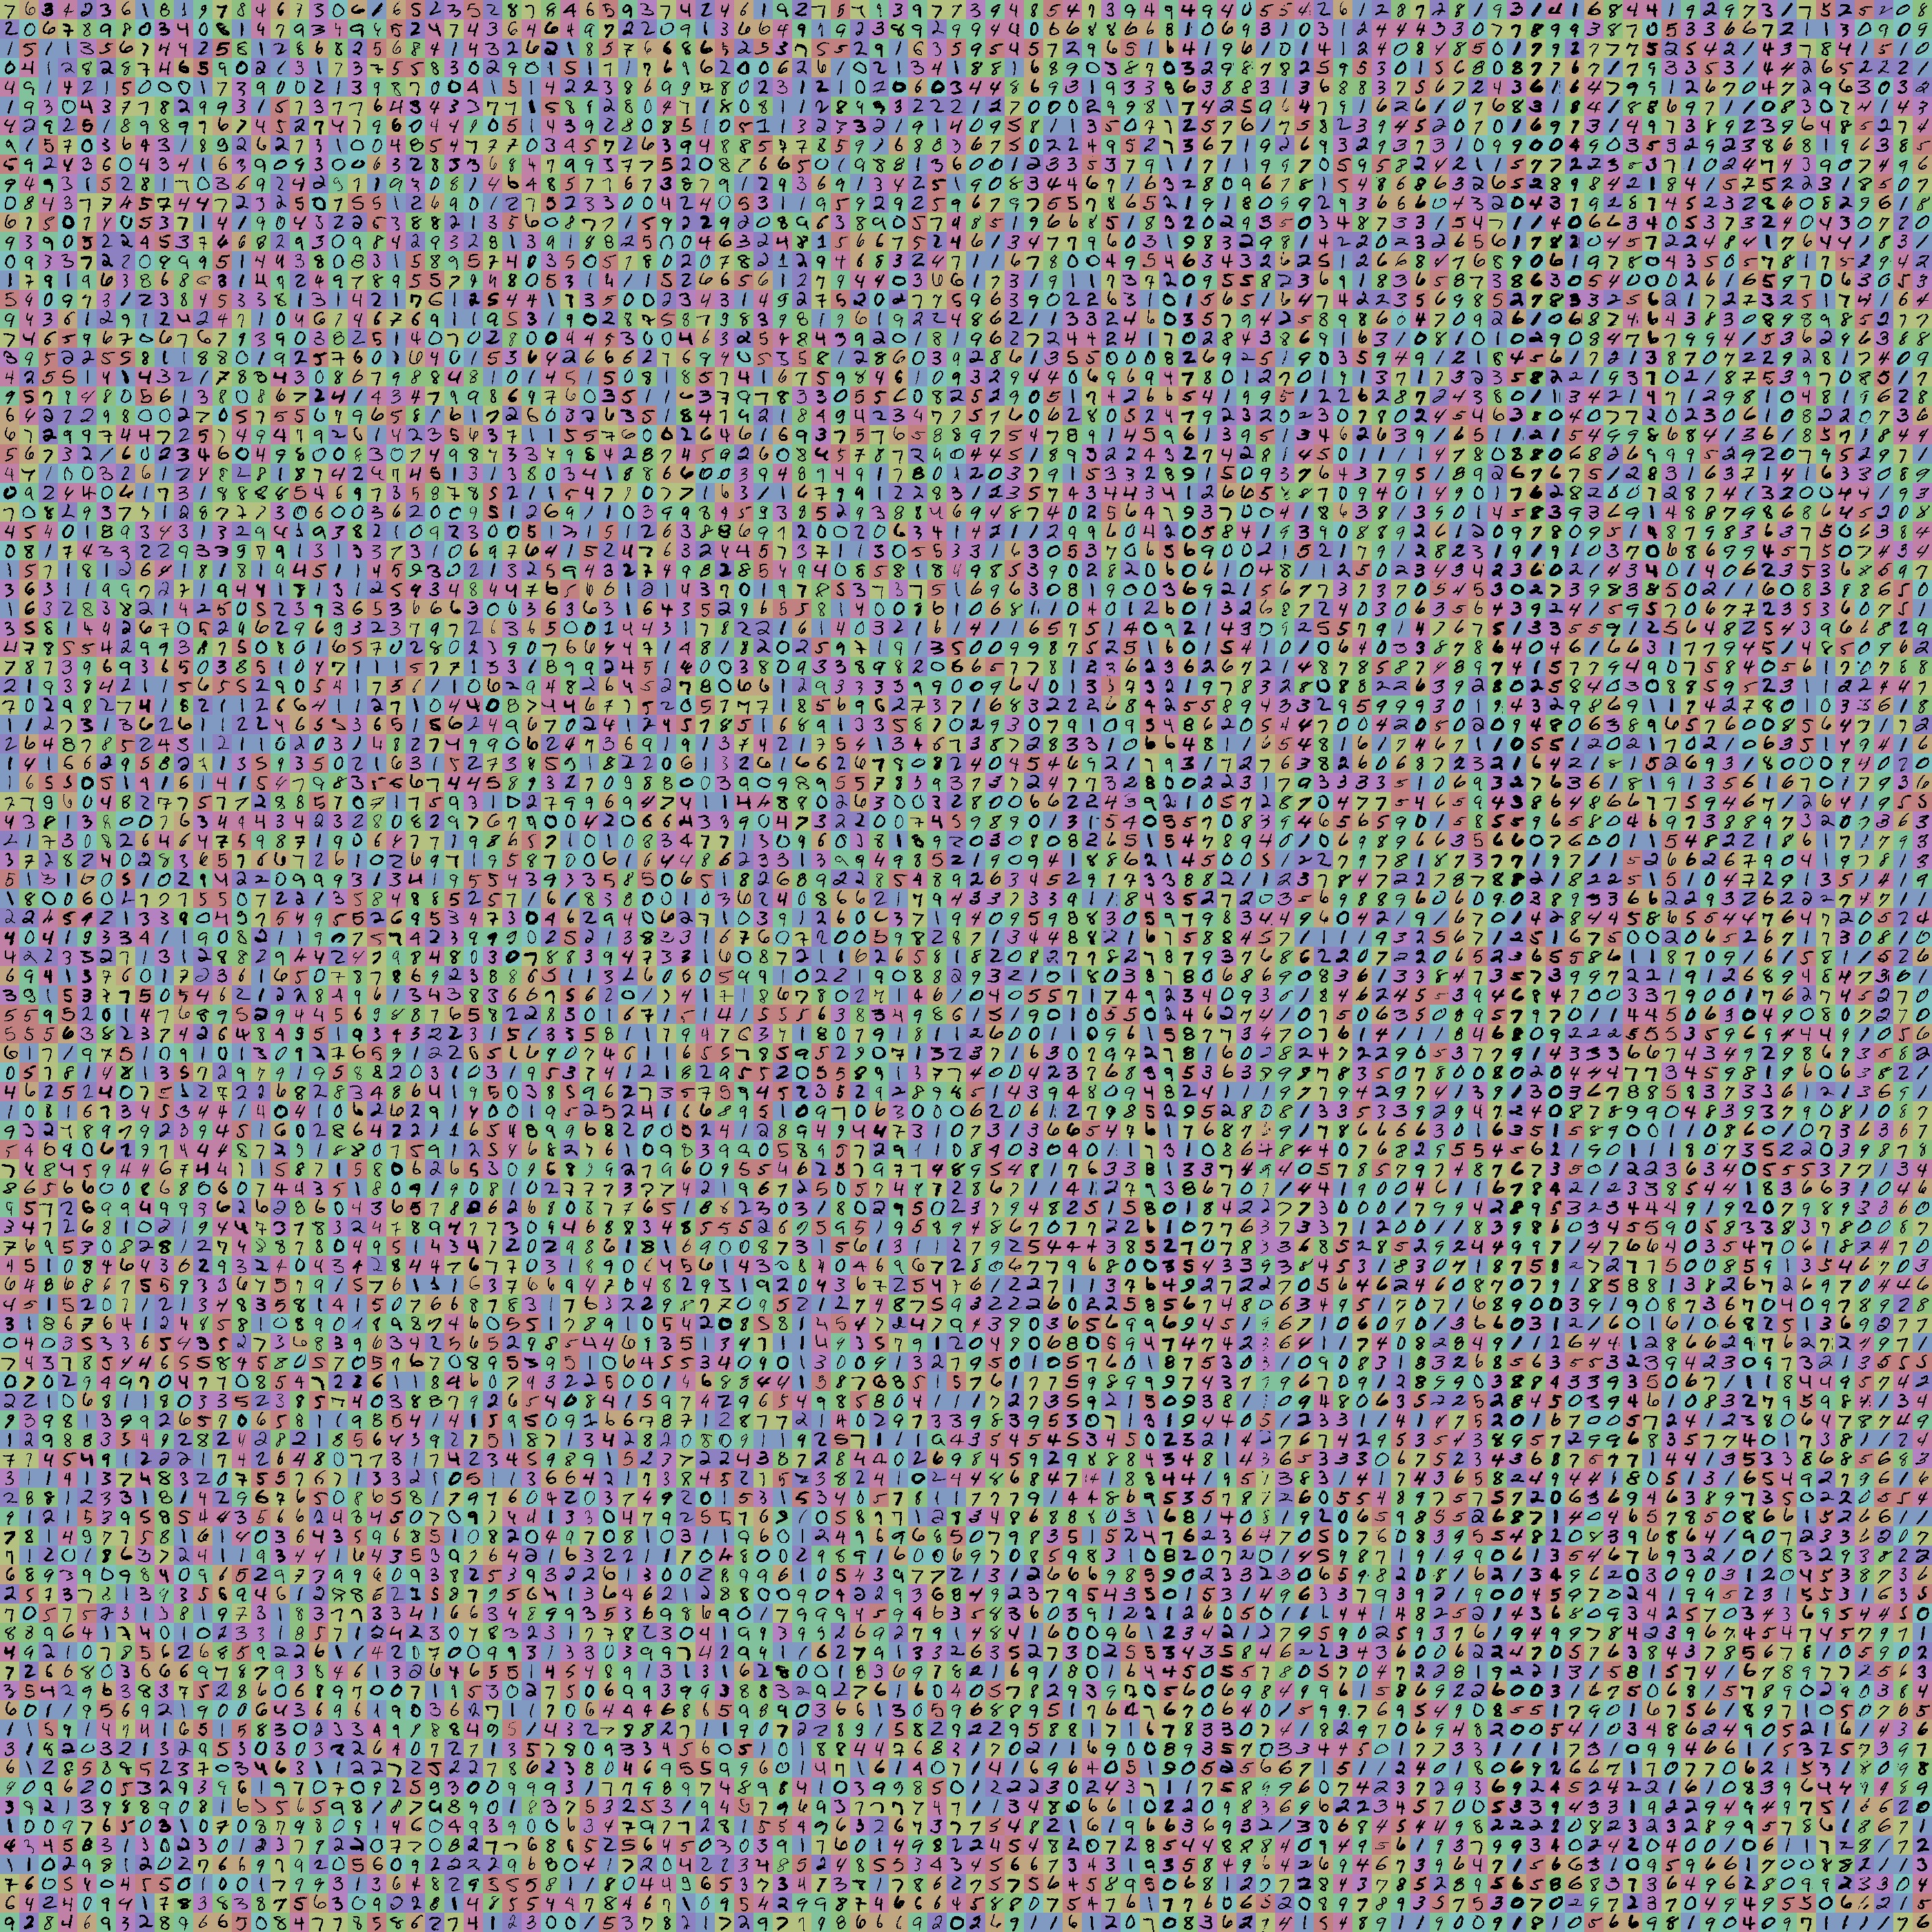

In [31]:
display(Image('sprite.png'))

### metadata 생성

In [32]:
with open('metadata.tsv','w') as f:
    for i in range(200):
        f.write(str(t_labels[i])+'\n')

In [33]:
# !cat metadata.tsv

### 생성된 스프라이트와 메타데이터를 processed2 로 복사

In [34]:
!rm -fr processed2
!mkdir processed2

!cp sprite.png processed2/
!cp metadata.tsv processed2/

### 새로운 네트웍 그래프 구성

In [35]:
tf.reset_default_graph()

In [36]:
input_ = tf.placeholder(shape=[None, input_size], dtype=tf.float32, name="input")
label_ = tf.placeholder(shape=[None], dtype=tf.int64, name="label")

hidden = tf.layers.dense(input_,150,activation=tf.nn.sigmoid)
output = tf.layers.dense(hidden,10)

pred = tf.nn.softmax(output)

label_onehot = tf.one_hot(label_, output_size, axis=1)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output, labels=label_onehot))
trainer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
optimize = trainer.minimize(loss)

correct = tf.equal(tf.argmax(pred, axis=1), label_)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [37]:
session = tf.InteractiveSession(config=tf.ConfigProto(gpu_options={'allow_growth':True}))
init = tf.global_variables_initializer()
session.run(init)

### 새로운 그래프 훈련

In [38]:
max_epochs = 100

In [39]:
for ep in tqdm(range(max_epochs)):
    total_loss = 0
    total_acc_v = 0
    for i in range(batch_count):
        img = np.reshape(
                images[i*batch_size:(i+1)*batch_size],
                [batch_size, 28 * 28])
        lbl = (labels[i*batch_size:(i+1)*batch_size])
        _, loss_v, acc_v = session.run(
                            [optimize, loss, accuracy],
                            feed_dict= {input_: img, label_: lbl})
        total_loss += loss_v
        total_acc_v += acc_v

    total_acc = 0
    for a in range(test_count):
        index = a * batch_size
        img = np.reshape(
                t_images[index:index+batch_size],
                [batch_size, 28 * 28])
        lbl = t_labels[index:index+batch_size]
        acc = session.run(accuracy,
                          feed_dict={input_:img, label_:lbl})
        total_acc += acc
    total_acc = total_acc / test_count

100%|██████████| 100/100 [01:50<00:00,  1.08s/it]


## embedding2 (입력값 레이블과 출력유니트 벡터에 대한 매핑) 생성

- 입력값 레이블과 출력유니트 벡터에 대한 매핑은 현재 없음
- 테스트 입력값 처음 200 개 에 대해서 inference 를 수행하여 매핑을 만듬
- 미니배치 한 번에 넣어도 괜찮을 만한 크기라서 session.run() 한번만 수행

In [40]:
num_emb2_points = 200
emb2 = np.zeros([num_emb2_points, 10],dtype=np.float32)
img = t_images[:200].reshape([200,784])
lbl = t_labels[:200]
acc, hid = session.run([accuracy,pred], feed_dict={input_:img, label_:lbl})
emb2[:,:] = hid

### 불편하지만, 텐서 변수로 만들어야 함

In [41]:
embedding2_var = tf.Variable(emb2, name='embedding2')
session.run(embedding2_var.initializer)

### ProjectorConfig() 사용

In [42]:
config = projector.ProjectorConfig()

### config.embeddings 를 이용해서 비어있는 embedding 추가

In [43]:
embedding = config.embeddings.add()

### embedding 속성 설정

In [44]:
embedding.tensor_name = embedding2_var.name
embedding.metadata_path = 'metadata.tsv'
embedding.sprite.image_path = 'sprite.png'
embedding.sprite.single_image_dim.extend([28, 28])

### embedding 을 파일로 저장해 줄 FileWriter 생성

In [45]:
summary_writer = tf.summary.FileWriter('processed2')

### config 에 지정된 embedding 들을 시각화 해 줄 것을 요청

In [46]:
projector.visualize_embeddings(summary_writer, config)

### 참조할 변수값을 저장해 줄 Saver() 생성하고, embedding2_var 텐서를 저장

In [47]:
saver = tf.train.Saver([embedding2_var])
saver.save(session, 'processed2/save-2.ckpt', 2)

'processed2/save-2.ckpt-2'

### 텐서보드 실행

In [ ]:
!tensorboard --logdir processed2

Starting TensorBoard 54 at http://rhee-mbp.local:6006
(Press CTRL+C to quit)


## 약간 다른 시연이지만, 입력 데이터 레이블과 이미지를 매핑한 embedding도 가능

https://github.com/normanheckscher/mnist-tensorboard-embeddings

<img  src="image_362.png" style="width:55.0rem"/>

# 추가 참고 문건

- https://www.tensorflow.org/get_started/embedding_viz

- http://colah.github.io/posts/2014-10-Visualizing-MNIST/

- http://colah.github.io/posts/2015-01-Visualizing-Representations/

